# Assignment 6

### 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

try:
    %tensorflow_version 2.x
except Exception as e:
    print(e)

Line magic function `%tensorflow_version` not found.


In [1]:
import tensorflow as tf
import cProfile

tf.__version__

'2.0.0'

In [2]:
tf.executing_eagerly()

True

In [3]:
x = [[2.]]
m = tf.matmul(x,x)
print('x matmul x = {}'.format(m))

x matmul x = [[4.]]


In [4]:
a = tf.constant([[1,2],[3,4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [5]:
# broadcasting
b = tf.add(a,1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [6]:
print(a*b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [7]:
print(tf.matmul(a,b))

tf.Tensor(
[[10 13]
 [22 29]], shape=(2, 2), dtype=int32)


In [8]:
import numpy as np

c = np.multiply(a,b)
print(c)

[[ 2  6]
 [12 20]]


In [9]:
a.numpy()

array([[1, 2],
       [3, 4]], dtype=int32)

### Computing Gradient

In [10]:
w = tf.Variable([[1.]])
with tf.GradientTape() as tape:
    loss = w * w
grad = tape.gradient(loss,w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


### Train a Model

In [11]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:10000,:,:]
y_test = y_test[:10000]

In [12]:
x_train = tf.cast(x_train[...,tf.newaxis]/255, tf.float32)
x_test = tf.cast(x_test[...,tf.newaxis]/255, tf.float32)

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [13]:
mnist_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,[3,3],activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10,activation='softmax')   
])

In [14]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [15]:
# build the model using Model
inputs = tf.keras.Input(shape=(None,None,1),name='digits')
conv_1 = tf.keras.layers.Conv2D(16,[3,3],activation='relu')(inputs)
conv_2 = tf.keras.layers.Conv2D(16,[3,3],activation='relu')(conv_1)
ave_pool = tf.keras.layers.GlobalAveragePooling2D()(conv_2)
outputs = tf.keras.layers.Dense(10,activation='softmax')(ave_pool)
mnist_model_2 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [16]:
mnist_model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 16)    160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________


In [17]:
mnist_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                   validation_split=0.1,shuffle=True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics = ['accuracy'])

In [25]:
mnist_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                     validation_split=0.1,shuffle=True,
                     loss = tf.keras.losses.categorical_crossentropy,
                     metrics = ['accuracy'])

In [27]:
mnist_model.fit(x_train,y_train,batch_size=128,epochs=100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 77us/sample - loss: 0.3599 - accuracy: 0.8906
Epoch 2/100
10000/10000 [==============================] - 1s 73us/sample - loss: 0.3526 - accuracy: 0.8932
Epoch 3/100
10000/10000 [==============================] - 1s 74us/sample - loss: 0.3572 - accuracy: 0.8918
Epoch 4/100
10000/10000 [==============================] - 1s 73us/sample - loss: 0.3476 - accuracy: 0.8963
Epoch 5/100
10000/10000 [==============================] - 1s 74us/sample - loss: 0.3511 - accuracy: 0.8944
Epoch 6/100
10000/10000 [==============================] - 1s 72us/sample - loss: 0.3468 - accuracy: 0.8968
Epoch 7/100
10000/10000 [==============================] - 1s 73us/sample - loss: 0.3454 - accuracy: 0.8959
Epoch 8/100
10000/10000 [==============================] - 1s 75us/sample - loss: 0.3394 - accuracy: 0.8957
Epoch 9/100
10000/10000 [==============================] - 1s 75us/sample - loss: 0.3400 - accuracy: 0.8987
Epoch

Epoch 76/100
10000/10000 [==============================] - 1s 71us/sample - loss: 0.2772 - accuracy: 0.9161
Epoch 77/100
10000/10000 [==============================] - 1s 70us/sample - loss: 0.2785 - accuracy: 0.9144
Epoch 78/100
10000/10000 [==============================] - 1s 73us/sample - loss: 0.2825 - accuracy: 0.9164
Epoch 79/100
10000/10000 [==============================] - 1s 71us/sample - loss: 0.2780 - accuracy: 0.9149
Epoch 80/100
10000/10000 [==============================] - 1s 72us/sample - loss: 0.2812 - accuracy: 0.9119
Epoch 81/100
10000/10000 [==============================] - 1s 74us/sample - loss: 0.2735 - accuracy: 0.9208
Epoch 82/100
10000/10000 [==============================] - 1s 71us/sample - loss: 0.2803 - accuracy: 0.9151
Epoch 83/100
10000/10000 [==============================] - 1s 70us/sample - loss: 0.2806 - accuracy: 0.9165
Epoch 84/100
10000/10000 [==============================] - 1s 70us/sample - loss: 0.2762 - accuracy: 0.9168
Epoch 85/100
10000/

In [29]:
'''这里不知道咋回事'''
mnist_model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.15180658013820647, 0.9539]

### Use TF2.0

In [29]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:10000,:,:]
y_test = y_test[:10000]

In [30]:
dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
     tf.cast(y_train,tf.int64)))

dataset = dataset.shuffle(1000).batch(32)

In [31]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [35]:
for epoch in range(5):
    for (batch,(images,labels)) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = mnist_model(images,training=True)
            loss_value = loss(labels,logits)
            
        grads = tape.gradient(loss_value,mnist_model.trainable_variables)
        optimizer.apply_gradients(zip(grads,mnist_model.trainable_variables))
    print("Epoch {} finished.".format(epoch))

Epoch 0 finished.
Epoch 1 finished.
Epoch 2 finished.
Epoch 3 finished.
Epoch 4 finished.


### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

The biggest advantage of CNN compared to FNN is that CNN is computationaly efficient. It uses local connectivity and parameters sharing in convolutional layers, and has special pooling operations without non-linear activation.

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

This hidden layer has 1300 parameters($5*5*50+1*50$).

Because with the parameter sharing scheme,the neurons in each depth slice(50 filters) to use the same weights and bias.

#### 3. What are "local invariant" and "parameter sharing" ?

**Local Connectivity**

When dealing with high-dimensional inputs such as images,it is impractical to connect neurons to all neurons in the previous volume. Instead, we will connect each neuron to only a local region of the input volume. The sparial extent of this connectivity is a hyperparameter called the receptive field of the neuron(equivalently this is the filter size). 

The extent of the connectivity along the depth axis is alwasy equal to the depth of the input volume. 

Thus, local connectivity means that the connections are local in space(along width and height).

**Parameter Sharing**

Parameter sharing scheme is used in convolutional layers to control the number of parameters.

By making one reasonable assumption,we can dramatically reduce the number of parameters:if one feature is useful to compute at some spatial position(x1,y1),then it should be useful to compute at a different position(x2,y2).

For example,if there is a single 2-dimensional slice of depth as a depth slice(e.g.a volume of size \[55*55*96\] has 96 depth slices,each of size \[55*55\]),we are going to constrain the neurons in each depth slice to use the same weigths and bias.

In practice during backpropagation,every neuron in the volume will compute the gradient for its weights, but these gradients will be added up across each depth slice and only update a single set of weights per slice.

#### 4. Why we use batch normalization ?

In deep learning, there is a typical problem which are called Internal Covariant Shift: the distribution of each layer's inputs changes during training, as the parameters of the previous layers change.  

Batch normalization is beneficial to address this issue. For each feature, batch normalization computes the mean and variance of that feature in the mimi-batch, then it subtract the mean and divides the feature by its mimi-batch standard deviation. The result is transforming the inputs to be mean 0 and unit variance.

We use batch normalization because it allows us to accelerates training, be less careful about initialization, use much higher learning rate. It also acts as a regularizer, in some cases eliminating the need for dropout.

#### 5. What problem does dropout try to solve ?

Dropout try to solve the problem of overfitting in deep learning,because deep learning architectures are now becoming deeper and wider.

Deep neural networks with a large number of parameters are very powerful in fitting the training dataset. However, overfitting is a serious problem in such networks. Dropout is a technique for addressing this problem.

The key idea of dropout is to randomly drop units(along with their connections) from the neural network during training.This prevent units from co-adaption too much and can be regard as a method of regularization.

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

The statement is wrong.

For the pooling layer, we do not need to explicity compute partial derivatives, since there are no paremeters. Instead we are concerned with how to distribute the gradient to each of the values in the corresponding input patch of pooling layer.

**For max pooling:** 

An activation value in the non-max values of each patch(such as $2*2$)certainly will not affect the output, since the output is only concerned about the max value in the patch. Therefore the non-max values have a gradient of 0. For the max value in each patch, since the output is just the value, so the gradient is 1.

**For average pooling:**

If the size of patch X is $2*2$,the output Z is given by the mean of the value:$$Z=\frac{X_{11}+X_{12}+X_{21}+X_{22}}{4}$$ thus a nudge in any of these four values in the patch will have a output nudge that is only a quarter of the sum. Therefore, the gradient is 0.25 for all values.

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

因为想跟风一波百度的问答摘要与推理比赛，只能用paddlepaddle提交结果，所以上手了paddlepaddle。下面的代码几乎是抄的，不过自己调了参。看在我这么实诚的份上，助教老师就别追究了哈。

In [1]:
import paddle as paddle
import paddle.fluid as fluid
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

### Step 1: 准备数据

In [4]:
!mkdir -p /home/msg/nlp_course_5th/nlp_course_assignment/第6次课作业/cifar/

In [8]:
'''
下载cifar数据集,并且可视化
'''
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz" -O cifar-10-python.tar.gz

--2019-11-16 12:08:52--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M   351KB/s    in 7m 57s  

2019-11-16 12:16:51 (349 KB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [9]:
!mv cifar-10-python.tar.gz /home/msg/nlp_course_5th/nlp_course_assignment/第6次课作业/cifar/

In [10]:
!ls -a ./cifar

.  ..  cifar-10-python.tar.gz


In [22]:
!ls ./cifar/ | xargs -i tar -zxvf ./cifar/{} -C ./cifar/

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [2]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [3]:
def cifar10_plot(data,num=10):
    imgs = []
    for i in range(num):
        im = data[b'data'][i, :]
        im_r = im[0:1024].reshape(32, 32)
        im_g = im[1024:2048].reshape(32, 32)
        im_b = im[2048:].reshape(32, 32)
        img = np.dstack((im_r, im_g, im_b))
        imgs.append(img)
    return imgs

In [4]:
cifar_path = "cifar/cifar-10-batches-py/data_batch_1"
imags = cifar10_plot(unpickle(cifar_path))

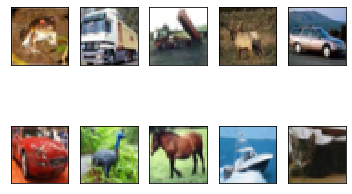

In [5]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(imags[i-1])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [2]:
'''
划分训练集和测试集，生成batch
虽然自己下载了数据集，可是自己划分训练集和测试集还是太麻烦
为了把时间用在模型上，所以还是用paddle内置的数据集
'''
BATCH_SIZE = 64

train_reader = paddle.batch(
    paddle.reader.shuffle(paddle.dataset.cifar.train10(),
                         buf_size=64*100),
    batch_size=BATCH_SIZE)

test_reader = paddle.batch(
    paddle.dataset.cifar.test10(),
    batch_size=BATCH_SIZE)

### Step 2: 搭建网络

In [3]:
'''
搭建有三个卷积的网络，在第一层和第二层用Batch Norm来解决梯度消失问题。
'''

def convolutional_neural_network(img):
    conv_pool_1 = fluid.nets.simple_img_conv_pool(
        input=img,
        filter_size=3,
        num_filters=128,
        pool_size=2,
        pool_stride=2,
        act='relu')
    conv_pool_1 = fluid.layers.batch_norm(conv_pool_1)
    
    conv_pool_2 = fluid.nets.simple_img_conv_pool(
        input=conv_pool_1,
        filter_size=3,
        num_filters=64,
        pool_size=2,
        pool_stride=2,
        act='relu')
    conv_pool_2 = fluid.layers.batch_norm(conv_pool_2)
    
    conv_pool_3 = fluid.nets.simple_img_conv_pool(
        input=conv_pool_2,
        filter_size=5,
        num_filters=32,
        pool_size=2,
        pool_stride=2,
        act='relu')
    
    prediction = fluid.layers.fc(input=conv_pool_3, size=10, act='softmax')
    return prediction

In [4]:
data_shape = [3,32,32]
images = fluid.layers.data(name='images',shape=data_shape,dtype='float32')
label = fluid.layers.data(name='label',shape=[1],dtype='int64')

In [5]:
predict = convolutional_neural_network(images)

In [6]:
'''
损失函数为交叉熵损失函数。
'''

cost = fluid.layers.cross_entropy(input=predict,label=label)
avg_cost = fluid.layers.mean(cost)
acc = fluid.layers.accuracy(input=predict,label=label)

In [7]:
'''
优化器为Adam，试过SGD，效果比较差，收敛慢，而且测试集上的准确率低于Adam
学习率试过0.01，结果表明0.001更好
'''

test_program = fluid.default_main_program().clone(for_test=True)
optimizer = fluid.optimizer.Adam(learning_rate=0.001)
optimizer.minimize(avg_cost)
print('完成')

完成


### Step 3：模型训练和模型评估

In [8]:
use_cuda = True
place = fluid.CUDAPlace(0) if use_cuda else fluid.CPUPlace()

In [9]:
exe = fluid.Executor(place)
exe.run(fluid.default_startup_program())

[]

In [10]:
feeder = fluid.DataFeeder(feed_list=[images,label],place=place)

In [11]:
all_train_iter = 0
all_train_iters = []
all_train_costs = []
all_train_accs = []

In [12]:
def draw_train_process(title,iters,costs,accs,label_cost,label_acc):
    plt.title(title,fontsize=15)
    plt.xlabel('iter',fontsize=10)
    plt.ylabel('cost/acc',fontsize=10)
    plt.plot(iters,costs,color='red',label=label_cost)
    plt.plot(iters,accs,color='green',label=label_acc)
    plt.legend()
    plt.grid()
    plt.show()

In [13]:
'''
用early stopping来防止过拟合。
训练100轮，每训练一轮，就在测试集上评估一次，如果损失在下降，就记录为最小的损失，并保存模型
这里不是抄的哦，自己写的。
不知道怎么回事，最后的acc只有70%。鉴于我是搞nlp的，就不去研究什么残差网络，VGG啥的了。
'''

EPOCH_NUM = 100
model_save_dir = 'model/cifar.model'
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)
    
min_cost = float('inf')
min_pass_id = 0
max_acc = 0

for pass_id in range(EPOCH_NUM):
    for batch_id,data in enumerate(train_reader()):
        train_cost,train_acc = exe.run(program=fluid.default_main_program(),
                                      feed=feeder.feed(data),
                                      fetch_list=[avg_cost,acc])
        all_train_iter = all_train_iter + BATCH_SIZE
        all_train_iters.append(all_train_iter)
        all_train_costs.append(train_cost[0])
        all_train_accs.append(train_acc[0])
        
    
    print('Train:%d, Cost:%0.5f, Accuracy:%0.5f'%
        (pass_id, train_cost[0],train_acc[0]))
            
    test_costs = []
    test_accs = []
    for batch_id, data in enumerate(test_reader()):
        test_cost,test_acc = exe.run(program=test_program,
                                    feed=feeder.feed(data),
                                    fetch_list=[avg_cost,acc])
        test_costs.append(test_cost[0])
        test_accs.append(test_acc[0])
    
    test_cost = (sum(test_costs)) / len(test_costs)
    test_acc = (sum(test_accs)) / len(test_accs)
    print('Test:%d, Cost:%0.5f, ACC:%0.5f'%(pass_id,test_cost,test_acc))
    
    if pass_id - min_pass_id == 20:
        break
        
    if test_cost < min_cost:
        min_cost,min_pass_id,max_acc = test_cost,pass_id,test_acc
        print('save model to %s'%(model_save_dir))
        fluid.io.save_inference_model(model_save_dir,
                                     ['images'],
                                     [predict],
                                     exe)
print('Test:%d, Min cost:%0.5f, Max acc:%0.5f'%(min_pass_id, min_cost,max_acc))    
print('训练模型并保存完成')

Train:0, Cost:1.55746, Accuracy:0.43750
Test:0, Cost:1.24631, ACC:0.57534
save model to model/cifar.model
Train:1, Cost:0.95553, Accuracy:0.81250
Test:1, Cost:0.98365, ACC:0.66342
save model to model/cifar.model
Train:2, Cost:0.60988, Accuracy:0.87500
Test:2, Cost:0.90117, ACC:0.69049
save model to model/cifar.model
Train:3, Cost:0.19926, Accuracy:0.93750
Test:3, Cost:0.87968, ACC:0.69885
save model to model/cifar.model
Train:4, Cost:0.21103, Accuracy:0.93750
Test:4, Cost:0.90778, ACC:0.70044
Train:5, Cost:0.78148, Accuracy:0.75000
Test:5, Cost:0.93389, ACC:0.70064
Train:6, Cost:0.16632, Accuracy:0.93750
Test:6, Cost:0.92937, ACC:0.71009
Train:7, Cost:0.40753, Accuracy:0.81250
Test:7, Cost:0.97321, ACC:0.70243
Train:8, Cost:0.35252, Accuracy:0.81250
Test:8, Cost:1.00546, ACC:0.70890
Train:9, Cost:0.41683, Accuracy:0.81250
Test:9, Cost:1.07073, ACC:0.70273
Train:10, Cost:0.20596, Accuracy:0.93750
Test:10, Cost:1.09074, ACC:0.70014
Train:11, Cost:0.33878, Accuracy:0.93750
Test:11, Cost:1

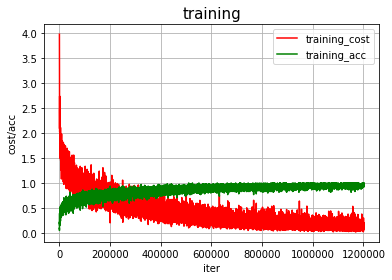

In [14]:
draw_train_process('training',all_train_iters,all_train_costs,all_train_accs,
                   'training_cost','training_acc')

In [15]:
infer_exe = fluid.Executor(place)
inference_scope = fluid.core.Scope()

In [16]:
def load_image(file):
    im = Image.open(file)
    im = im.resize((32,32),Image.ANTIALIAS)
    im = np.array(im).astype(np.float32)
    im = im.transpose((2,0,1))
    im = im / 255.0
    im = np.expand_dims(im,axis=0)
    print('im 的维度是：',im.shape)
    return im

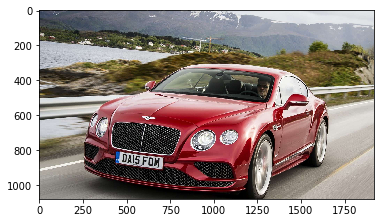

im 的维度是： (1, 3, 32, 32)
results [array([[1.3122125e-06, 9.9934655e-01, 3.7806476e-08, 9.4852730e-09,
        3.4011048e-08, 1.6257284e-09, 9.6022511e-08, 3.1219062e-07,
        1.5082990e-06, 6.5005926e-04]], dtype=float32)]

infer result:automobile


In [20]:
'''
在网上找了狗的图片，结果给我预测成了鹿。
于是我找了轿车的图片，预测正确。
'''

with fluid.scope_guard(inference_scope):
    [inference_program,
    feed_target_names,
    fetch_targets] = fluid.io.load_inference_model(model_save_dir,infer_exe)
    
    infer_path = 'car.jpg'
    img = Image.open(infer_path)
    plt.imshow(img)
    plt.show()
    
    img = load_image(infer_path)
    
    results = infer_exe.run(inference_program,
                           feed={feed_target_names[0]:img},
                           fetch_list=fetch_targets)
    print('results',results)
    label_list = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse",
        "ship", "truck"]
    print('\ninfer result:%s'% label_list[np.argmax(results[0])])

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [3]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [21]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # 卷积核与被卷积的某块区域，相同位置的元素相乘
    s = a_prev_slice * W
    
    # 相乘后得到的矩阵中，所有元素之和  
    Z = np.sum(s)
    
    # 加上偏置值b
    Z += b.reshape(())
    
    return np.round(Z,11)

In [22]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.99908945068


Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [6]:
%%time
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height 
    and width of an image, as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    # X为四维数组，第1维（batch-size）和第4维（卷积核个数）不需要补零。
    X_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),'constant')
    
    return X_pad

CPU times: user 49 µs, sys: 0 ns, total: 49 µs
Wall time: 51.7 µs


In [7]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [27]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # 得到输入数组 A_prev 的维度  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # 得到参数 W 的维度 
    (f, f, n_C_prev, n_C) = W.shape
    
    # 超参数：步长和补零个数 
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # 经过卷积后一张特征图的长和宽 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    # 将输出数组 Z 以0值进行初始化，n_C为输出的通道数，等于卷积核的个数。 
    Z = np.zeros((m,n_H,n_W,n_C))
    
    # 对输入数组 A_prev 进行补零
    A_prev_pad = zero_pad(A_prev, pad)
    
    # 取出batch中的一个样本
    for i in range(m): 
        a_prev_pad = A_prev_pad[i]
        
        for h in range(n_H):          
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):      
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range(n_C):    
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end,:] 
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev,weights,biases)
                                        
    assert(Z.shape == (m, n_H, n_W, n_C))
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [29]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576251
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [30]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i,vert_start:vert_end, horiz_start:horiz_end,c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [31]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.